**Beteiligte:** *Bitte hier Namen des Teams / Name der Einzelperson einfügen, siehe Bemerkungen unten*

<div style="width: 80%">
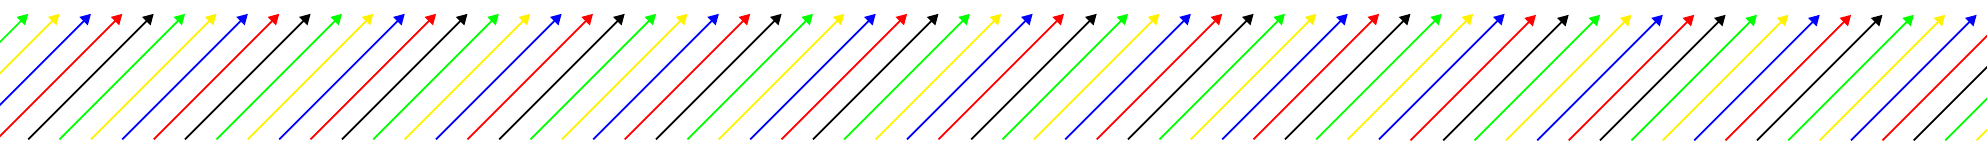<br>
<div style="font-size: 20pt; float: left;">Grundlagen der linearen Algebra</div>
<div style="font-size: 20pt; text-align: right;">HS 2021</div>
<div style="font-size: 15pt; margin-top: 10px;">Fachexperten: Roger Burkhardt, Joana Portmann</div>
</div>
<br>


# Mini-Challenge 2 zum Thema *Matrizenalgebra*

In der zweiten Mini-Challenge setzen Sie sich vertieft mit den verschiedenen Matrizenoperationen, die Sie inzwischen in Skript und Übungen kennengelernt haben sollten, auseinander. Zusätzlich vertiefen Sie Ihr Wissen über die numpy-Bibliothek, indem Sie einige besprochene Methoden konkret implementieren und dadurch die Besonderheiten von numpy kennenlernen, an die man sich durchaus etwas gewöhnen muss. Mit der Lösung dieser Mini-Challenge und dem genauen Verständnis aller getätigten Schritte können Sie sich ein erstes leicht vertieftes Wissen über numpy aneignen, dass Sie in einigen weitern wichtigen Kompetenzen des Studiums wieder dringend brauchen werden (Machine Learning, Deep Learning, High-Performance Computing, ..). Stellen Sie also sicher, dass Sie jeden einzelnen Schritt gut verstanden haben, dann werden die kommenden Mini-Challenges für Sie wesentlich einfacher sein.

**zu beachten:**

* Wir stellen Ihnen teilweise schon ein Rahmengerüst der Implementierung zur Verfügung. Verändern Sie bitte diese Gerüste nicht, sondern fügen Sie Ihren Code bei den entsprechenden Kommentaren ein. 

* Sie dürfen in dieses Notebook über den Menüpunkt 'Insert' durchaus weitere Zeilen einfügen. Falls Sie gerne Markdown-Notizen in die Zelle einfügen möchten, können Sie den Modus der Zelle von 'Code' auf 'Markdown' setzen (oder Esc-M drücken).

* Je besser Sie Ihre Berechnungen und Ihren Code kommentieren, desto eher können Sie bei Fehlern noch Teilpunkte erhalten.

**Abgabeformalitäten:**

* Geben Sie das ergänzte Jupyter-Notebook spätestens bis zum **09.11.2021** um **23:59** per Email an [Roger Burkhardt](mailto:roger.burkhardt@fhnw.ch) ab.
* Sie dürfen die Mini-Challenge in Teams (Teamgrösse: max. 4 Personen) lösen und abgeben. 
* Ausserhalb der Teams darf durchaus über die Übung diskutiert werden, programmieren soll aber jede Gruppe für sich. Gleichen sich zwei abgegebene Notebooks zu stark, werden die Notebooks beider Parteien als nicht sinnvoll bearbeitet betrachtet.

Für diese Mini-Challenge benötigen Sie nur die numpy-Bibliothek, für die freiwilligen Aufgaben sind `sympy` und `matplotlib` ebenfalls erlaubt:

In [2]:
import numpy as np

## Aufgabe 1: Das Matrizenprodukt (10 Punkte)

Gegeben seien die Matrizen

$$
A = \begin{pmatrix} 2 & 2 & -2 \\ 1 & 0 & 2 \\ -2 & -3 & 3 \end{pmatrix}, \qquad B = \begin{pmatrix} 5 & -2 \\ -1 & 7 \\ 0 & 0 \end{pmatrix}, \qquad C = \begin{pmatrix} 0 & 3 \\ 3 & -5 \end{pmatrix}, \qquad D = \begin{pmatrix} 1 & -1 \end{pmatrix}
$$

Berechnen Sie systematisch alle möglichen Produkte mit numpy. Definieren Sie dazu eine Liste aller Matrizen und iterieren Sie mit zwei for-Loops darüber, um alle möglichen Kombinationen abzudecken. Denken Sie daran, dass das Matrizenprodukt nicht kommutativ ist.

**Hinweise:** 
* Wenn Sie nicht prüfen, ob ein bestimmtes Matrizenprodukt überhaupt möglich ist, dann wird der for-Loop mit einem Fehler abbrechen. Prüfen Sie die Existenz des Produkts über das `shape`-Attribut der numpy-Arrays und geben Sie entweder das Matrixprodukt aus oder eine Meldung, dass das Produkt nicht existiert.
* Wir stellen Ihnen eine Funktion `numpy2latex` zur Verfügung, die ein numpy-Array schön mit LateX für das Jupyter-Notebook formatiert. Studieren Sie die Beispielausgabe und verwenden Sie diese Funktion in Ihrem Code.
* Mit [Format-Strings](https://pyformat.info/) können Sie Ihre Ausgabe sauber organisieren: `print( "Wert: {}".format( wert ) )`

In [3]:
from IPython.display import display, Math

def numpy2latex( A ):
    """
    Funktion zum Umwandeln eines zweidimensionalen numpy-Arrays in einen Latex-String.
    """
    # Prüfe, ob das übergebene Array zwei Dimensionen besitzt
    if len( A.shape ) > 2:
        raise Exception( "Nur zweidimensionale Arrays erlaubt!" )
    
    # Erstelle latex-String
    latex = "\\begin{pmatrix}"
    for i in range( A.shape[0] ):
        line = ""
        for j in range( A.shape[1] ):
            line += str( A[i,j] ) + " & "
        latex += line + " \\\\ "
    latex += "\\end{pmatrix}"
    return latex

# Erstelle eine Beispielmatrix und gebe sie mit `display` und `Math` aus
M = np.array( [[3, -2], [-7, 6]] )
display(Math(numpy2latex( M )))

<IPython.core.display.Math object>

In [4]:
# IHR CODE
A = np.array([[2, 2, -2], [1, 0, 2], [-2, -3, 3]])
B = np.array([[5, -2], [-1, 7], [0, 0]])
C = np.array([[0, 3], [3, -5]])
D = np.array([[1, -1]])
matrices = [A, B, C, D]

for i in range(len(matrices)):
    I_M = matrices[i]
    
    for M in [x for x in matrices if not np.array_equal(x, I_M)]:
        if np.shape(I_M)[1] == np.shape(M)[0]:
            print(f"{i + 1} * {matrices.index(M) + 1}")
            display(Math(numpy2latex( I_M@M )))

1 * 2


/var/folders/b7/mggcdv6x2zv6337xmxr20svh0000gn/T/ipykernel_62154/827954548.py:13: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  print(f"{i + 1} * {matrices.index(M) + 1}")


<IPython.core.display.Math object>

2 * 3


<IPython.core.display.Math object>

4 * 3


<IPython.core.display.Math object>

## Aufgabe 2: Berechnung der Determinante (15 Punkte)

Schreiben Sie eine Funktion `myDet(A)`, welche die Determinante einer quadratischen Matrix A mit Hilfe des Laplace'schen Entwicklungssatzes berechnet (10P). Vergleichen Sie Ihre Funktion mit der Funktion in numpy (Korrektheit, Genauigkeit, Performance) (5P)!

**Hinweise**: 
* numpy's Funktionen zur Berechnung der Determinante und der Inverse erzeugen schnell numerische Fehler im Bereich von $< 10^{-15}$. Diese Fehler sind zwar für uns vernachlässigbar klein, aber sind einerseits optisch unschön und machen andererseits Probleme, wenn man mit dem Vergleichsoperator auf das erwartete Resultat prüfen möchte. Falls solche Fehler auftreten, verwenden Sie die Funktion `np.isclose( x, y )` statt `x == y`.
* Wichtig: Beachten Sie, dass die Zuweisung `A2 = A` keine Kopie der Matrix `A` macht, sondern nur einen neuen Zeiger auf das gleiche Objekt. Wenn Sie nach einer derartigen Zuweisung `A` verändern, verändern Sie damit automatisch auch `A2`. Benutzen Sie für eine echte Kopie `A2 = A.copy()` und stellen Sie am Schluss sicher, dass Sie die ursprüngliche Matrix `A` nicht verändert haben.
* Auch mit dem Zugriff auf einzelne Zeilen oder Spalten per Index bekommen Sie nicht eine Kopie der Zeile/Spalte zurück, sondern ebenfalls nur einen Zeiger, passen Sie also auf!
* Indem Sie [%timeit](https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-timeit) mit einem Leerzeichen vor den Aufruf einer Funktion schreiben, können Sie die benötigte Laufzeit ausgeben lassen.
* Selbstverständlich dürfen Sie auch Hilsfunktionen (z.B. calcMinor(A,i,j), calcCofactor(A,i,j), ...) erstellen und verwenden!

In [5]:
# IHR CODE

A = np.array([[3, 1, 5, 1], [-1, 0, -2, 0], [0, 0, 1, -1], [4, 0, 4, 1]])
# A = np.random.rand(5, 5)
display(Math(numpy2latex( A )))

def get_minor(arr, i, j):
    return np.delete(np.delete(arr, i, axis=0), j, axis=1)
            
def myDet(M):
    r, c = np.shape(M)
    if r != c:
        raise Exception("Matrix nicht quadratisch")
    
    if r == 2:
        return (M[0][0] * M[1][1]) - (M[1][0] * M[0][1])
    
    return sum(((-1) ** (i + 2)) * M[i][0] * myDet(get_minor(M.copy(), i, 0)) for i in range(r))

x, y = myDet(A), np.linalg.det(A)
print(x)
print(y)
print(np.isclose(x,y))

<IPython.core.display.Math object>

-3
-2.9999999999999996
True


In [6]:
for n in range(5):
    print("---")
    print(f"Test run #{n + 1}")
    
    dim = 5 + n
    M_rand = np.random.rand(dim, dim)
    
    %timeit myDet(M_rand)
    %timeit np.linalg.det(M_rand)

---
Test run #1


KeyboardInterrupt: 

## Aufgabe 3: Berechnung der Inversen (10 Punkte)

Schreiben Sie eine Funktion `myInv(A)`, welche die Inverse einer regulären quadratischen Matrix `A` mit Hilfe der Adjunktenmethode  berechnet (8P). Geben Sie mit `raise Exception("<Ihre Fehlermeldung>")` eine Fehlermeldung aus, falls die die Matrix `A` nicht invertierbar ist (2P). 

In [ ]:
# IHR CODE
#A = np.array([[2, 0, 1], [3, 2, -4], [1, 0, 3]])
A = np.random.rand(5, 5)
display(Math(numpy2latex( A )))


def myTranspose(M):
    rows, cols = np.shape(M)
    M_T = np.zeros(shape=(cols, rows))
    
    for i in range(rows):
        for j in range(cols):
            M_T[j][i] = M[i][j]
            
    return M_T

def myInv(M):
    r, c = np.shape(M)
    M_C = M.copy()
    
    for i in range(r):
        for j in range(c):
            M_C[i][j] = ((-1) ** (i + j + 2)) * myDet(get_minor(M.copy(), i, j))
    
    return (1/myDet(M)) * myTranspose(M_C.copy())


x, y = myInv(A), np.linalg.inv(A)
display(Math(numpy2latex( np.isclose(x,y) )))

## Aufgabe 4: Lineare Gleichungssysteme ohne Gauss lösen (15 Punkte)

Im Folienmaterial lernen Sie zusätzlich zum Gauss-Algorithmus zwei weitere Möglichkeiten kennen, wie Sie die Lösung eines linearen Gleichungssystems berechnen können.

Gegeben seien die linearen Gleichungssysteme $G_1$:

$$
\left| \;
\begin{align}
x + y + z &= 2\\
6x - 4y + 5z &= 31\\
5x + 2y + 2z &=13
\end{align}
\;
\right|
$$

und $G_2$:

$$
\left| \;
\begin{align}
x + y + z &= 2\\
y - 3z &= 1\\
2x + y + 5z &=0
\end{align}
\;
\right|
$$

mit den erweiterten Koeffizientenmatrizen

In [ ]:
M1 = np.array( [[1,1,1,2],[6,-4,5,31],[5,2,2,13]] )
M2 = np.array( [[1,1,1,2],[0,1,-3,1],[2,1,5,0]] )

### a) Lösung mit Hilfe der Inversen (5P)

Schreiben Sie eine Funktion `solve( M )`, die als Argument die erweiterte Koeffizientenmatrix eines linearen Gleichungssystems nimmt und es mittels der inversen Matrix löst. Probieren Sie Ihre Funktion an den beiden Gleichungssystemen $G_1$ und $G_2$ aus.

**Hinweis**: Dieses Verfahren funktioniert nur für invertierbare Koeffizientenmatrizen. Geben Sie mit `raise Exception("<Ihre Fehlermeldung>")` eine Fehlermeldung aus, falls die zu `M` gehörende Koeffizientenmatrix nicht invertierbar ist.

In [ ]:
# IHR CODE

def getKoef(M):
    return np.delete(M.copy(), np.shape(M)[1] - 1, 1)

def getRes(M):
    return M[:, np.shape(M)[1]-1].reshape((np.shape(M)[0],1))

def solve(M):
    return myInv(getKoef(M.copy()))@getRes(M.copy())

display(Math(numpy2latex( np.isclose(solve(M1), np.linalg.solve(getKoef(M1.copy()), getRes(M1.copy()))) )))

### b) Lösung mittels Cramer'scher Regel (5P)

Schreiben Sie nun eine Funktion `cramer( M )`, die als Argument ebenfalls die erweiterte Koeffizientenmatrix eines linearen Gleichungssystems nimmt, aber jetzt die Cramer'sche Regel zur Lösung verwendet. Probieren Sie Ihre Funktion ebenfalls an den beiden Gleichungssystemen $G_1$ und $G_2$ aus.

**Hinweis**: Hier funktioniert das Verfahren nur für Koeffizientenmatrizen mit Determinante ungleich Null, geben Sie ebenfalls falls nötig eine entsprechende Fehlermeldung aus.

In [ ]:
# IHR CODE
def cramer(M):
    return None

### c) Performance (5P)

Indem Sie [%timeit](https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-timeit) mit einem Leerzeichen vor den Aufruf der Funktion schreiben, können Sie Ihre beiden Funktionen `solve` und `cramer` jeweils mehrere Male laufen lassen und die durchschnittlich benötigte Laufzeit ausgeben lassen.

In [ ]:
# IHR CODE


In [ ]:
# IHR CODE


Mit `np.random.rand()` können Sie auch grössere Matrizen generieren. Es ist zu erwarten, dass die Unterschiede bei grossen Matrizen noch grösser werden. Zum Beispiel:

In [ ]:
S = np.random.rand(20,21)

Berechnen Sie auch hier die durchschnittlich benötigten Laufzeiten:

In [ ]:
# IHR CODE


In [ ]:
# IHR CODE


Was stellen Sie fest? Welche Ihrer Funktionen ist effizienter?

*Ihre Antwort in Markdown*

### Freiwilliger Zusatz

Überlegen Sie sich dazu auch, für welche spezifischen Problemfälle Sie 1) den Gaussalgorithmus, 2) die Inverse der Koeffizientenmatrix oder 3) die Cramer'sche Regel einsetzen würden (unterscheiden Sie dabei, ob Sie von Hand rechnen müssen oder den Computer benützen dürfen).

In [19]:
import sympy as sym

b11 = sym.symbols('b11')
b12 = sym.symbols('b12')
b13 = sym.symbols('b13')
b21 = sym.symbols('b21')
b22 = sym.symbols('b22')
b23 = sym.symbols('b23')
b31 = sym.symbols('b31')
b32 = sym.symbols('b32')
b33 = sym.symbols('b33')

B = sym.Matrix([[b11, b12, b13], [b21, b22, b23], [b31, b32, b33]])
A = sym.Matrix([[1,1,1], [1,1,0], [1,0,0]])

AB = A*B
print(AB)

BA = B*A
print(BA)

Matrix([[b11 + b21 + b31, b12 + b22 + b32, b13 + b23 + b33], [b11 + b21, b12 + b22, b13 + b23], [b11, b12, b13]])
Matrix([[b11 + b12 + b13, b11 + b12, b11], [b21 + b22 + b23, b21 + b22, b21], [b31 + b32 + b33, b31 + b32, b31]])


In [21]:
gl = AB-BA
print(gl)

Matrix([[-b12 - b13 + b21 + b31, -b11 + b22 + b32, -b11 + b13 + b23 + b33], [b11 - b22 - b23, b12 - b21, b13 - b21 + b23], [b11 - b31 - b32 - b33, b12 - b31 - b32, b13 - b31]])
